In [1]:
options(warn = - 1) 

In [3]:
#install.packages(c('ISLR','MASS','class','rpart','rpart.plot','tree'))
library(ISLR)
library(MASS)
library(class)
library(rpart)
library(rpart.plot)
library(tree)

# Classification

### In this exercise, we will practice classification problem using logistic regression, LDA and KNN methods, and compare the model using out of sample data, base on confusion matrix.

### Data: use iris data, 2-dimension with predictors Petal Length and Petal Width, Species only includes setosa and versicolor.

## 1. Use 70% randomly picked observations as training data, train the logistic regression, LDA and KNN(3).

### Fetching Data

In [4]:
da = iris[,c(-1,-2)] #Removing unuseful columns
da = da[!da$Species=="virginica",] # ONLY setosa and versicolor

### Creating Train & Test data (70:30)

In [6]:
train_idx = sample(1:nrow(da),size = 70,replace=FALSE)
da_train = da[train_idx,] 
da_test = da[-train_idx,] 

### Logistic Regression Fit

In [7]:
logistic_fit = glm(Species ~ Petal.Length + Petal.Width, 
                   data = da , family = binomial,subset = train_idx)

### Linear Discriminant Analysis(LDA) Fit

In [8]:
lda_fit = lda(Species ~ Petal.Length + Petal.Width,data = da, subset = train_idx)

### KNN(3) Fit

In [9]:
train_x = da_train[,c("Petal.Length","Petal.Width")]
train_y = da_train[,"Species"]
test_x = da_test[,c("Petal.Length","Petal.Width")]

set.seed(12)
knn_pred = knn(train_x,test_x,train_y,k=3)


## 2. The 30% held out data used to test against the models. Compare model performance based on confusion matrix for each model, and print out of sample error rate.

### Logistic Regression Model Performance & Confusion Matrix.

In [10]:
logistic_prob = predict(logistic_fit,da_test,type = "response") #Prediction for test data
logistic_pred = rep("setosa",nrow(da_test))

logistic_pred[logistic_prob>0.5] = "versicolor"
table(logistic_pred,da_test$Species)   #Confusuion Matrix



             
logistic_pred setosa versicolor virginica
   setosa         15          0         0
   versicolor      0         15         0

In [11]:
mean(logistic_pred==da_test$Species)# Model Accuracy


[1] 1

Model Accuracy is 100% for test data. Hence Out of Sample error is zero.

### LDA Performance & Confusion Matrix.

In [12]:
lda_fit
lda_pred = predict(lda_fit,da_test)  #Prediction for test data

Call:
lda(Species ~ Petal.Length + Petal.Width, data = da, subset = train_idx)

Prior probabilities of groups:
    setosa versicolor 
       0.5        0.5 

Group means:
           Petal.Length Petal.Width
setosa         1.468571   0.2542857
versicolor     4.197143   1.2885714

Coefficients of linear discriminants:
                  LD1
Petal.Length 2.232689
Petal.Width  2.213895

Prior Probabilities :

setosa =  0.5142857

versicolor = 0.4857143 


These represent the proportions of each Species in the training set.

For example, 51.4% of all observations in the training set were of species setosa.

Group means: These display the mean values for each predictor variable for each species.

In [13]:
table(lda_pred$class,da_test$Species)  #Confusuion Matrix

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0         0

In [14]:
mean(lda_pred$class==da_test$Species)# Model Accuracy

[1] 1

Model Accuracy is 100% for test data. Hence Out of Sample error is zero.

### KNN(3) Performance & Confusion Matrix.

In [15]:
table(knn_pred,da_test$Species) #Confusion Matrix

            
knn_pred     setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          0         0

In [16]:
mean(knn_pred==da_test$Species) #Accuracy

[1] 1

Model Accuracy is 100% for test data. Hence Out of Sample error is zero.

# Tree Method

### Use Carseats dataset in ISLR library. Predict Sales level based on other predictors in the dataset.

## 1. Convert Sales into qualitative variable SalesGrp with four groups base on quartiles. Fit a classification tree, plot the tree, and interpret the results, what is the MSE?


In [17]:
attach(Carseats)

### Quantiles for salesgrp column creation

In [18]:
q = as.numeric(quantile(Sales))
q
set.seed(11)

[1]  0.00  5.39  7.49  9.32 16.27

### Creating salesgrp column and replacing sales column with it.

In [19]:
Carseats$salesgrp[Sales < q[2]]<- "very low"
Carseats$salesgrp[Sales >q[2] & Sales <q[3]] <- "low"
Carseats$salesgrp[Sales >q[3] & Sales <q[4] ]<- "high"
Carseats$salesgrp[Sales > q[4]] <- "very high"
Carseats$salesgrp = as.factor(Carseats$salesgrp)  # Converting chr to factor datatype
Carseats = Carseats[,-1]  #Deleting sales column
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...
 $ salesgrp   : Factor w/ 4 levels "high","low","very high",..: 3 3 3 2 4 3 2 3 2 4 ...


### Creating Test & Train dataset(75:25)

In [20]:
data_sample = sample(1:nrow(Carseats),size = nrow(Carseats)*0.75,replace=FALSE)
train = Carseats[data_sample,] 
test = Carseats[-data_sample,] 
dim(train)

[1] 300  11

### Classification Tree fit on train data to predict salesgrp (without pruning)

In [21]:
tree_fit = rpart(train$salesgrp ~ .,method = "class" ,data=train)

### Tree Plot

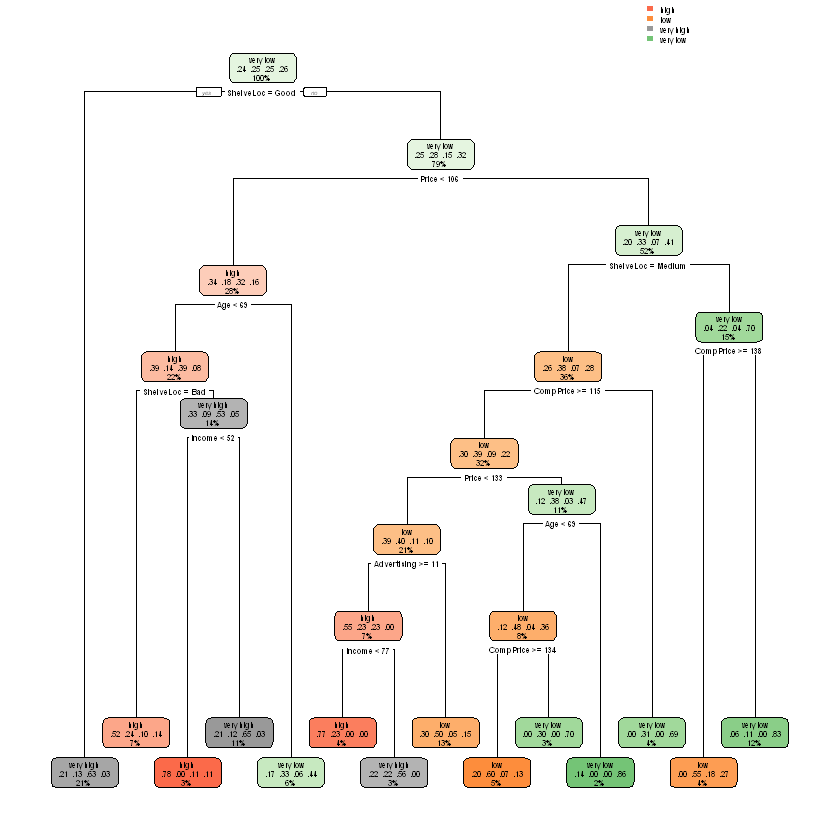

In [22]:
rpart.plot(tree_fit)


Classification tree:
rpart(formula = train$salesgrp ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] Advertising Age         CompPrice   Income      Price       ShelveLoc  

Root node error: 220/297 = 0.74074

n=297 (3 observations deleted due to missingness)

        CP nsplit rel error  xerror     xstd
1 0.168182      0   1.00000 1.05909 0.032208
2 0.068182      1   0.83182 0.83182 0.038096
3 0.050000      2   0.76364 0.83182 0.038096
4 0.031818      3   0.71364 0.78636 0.038631
5 0.027273      5   0.65000 0.75909 0.038862
6 0.022727      6   0.62273 0.77273 0.038755
7 0.015909      9   0.55455 0.78182 0.038674
8 0.013636     11   0.52273 0.80000 0.038490
9 0.010000     13   0.49545 0.80455 0.038439


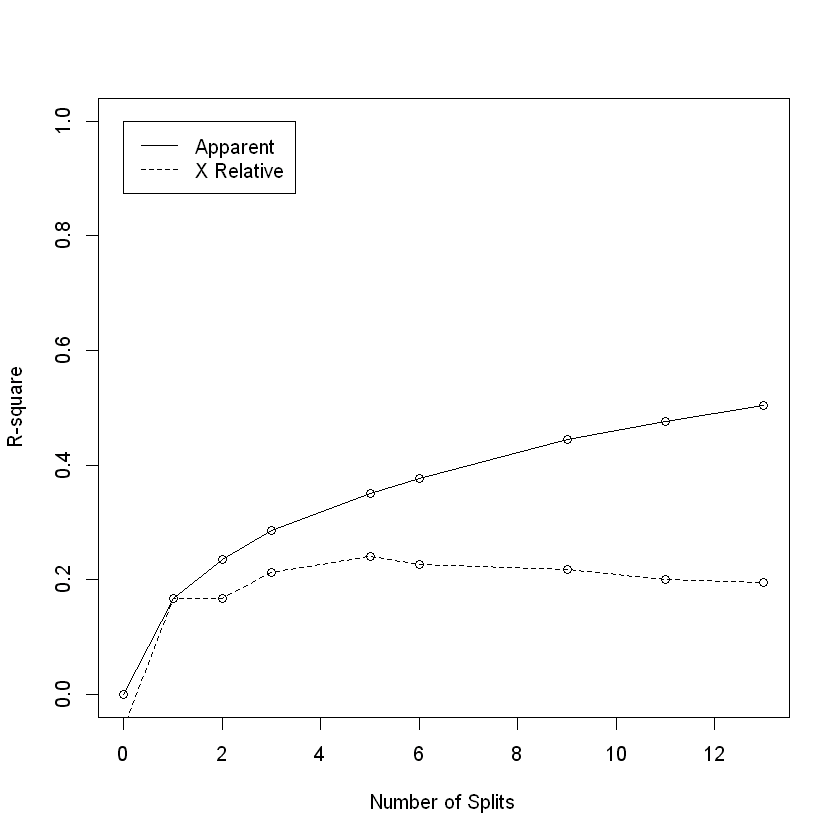

NULL

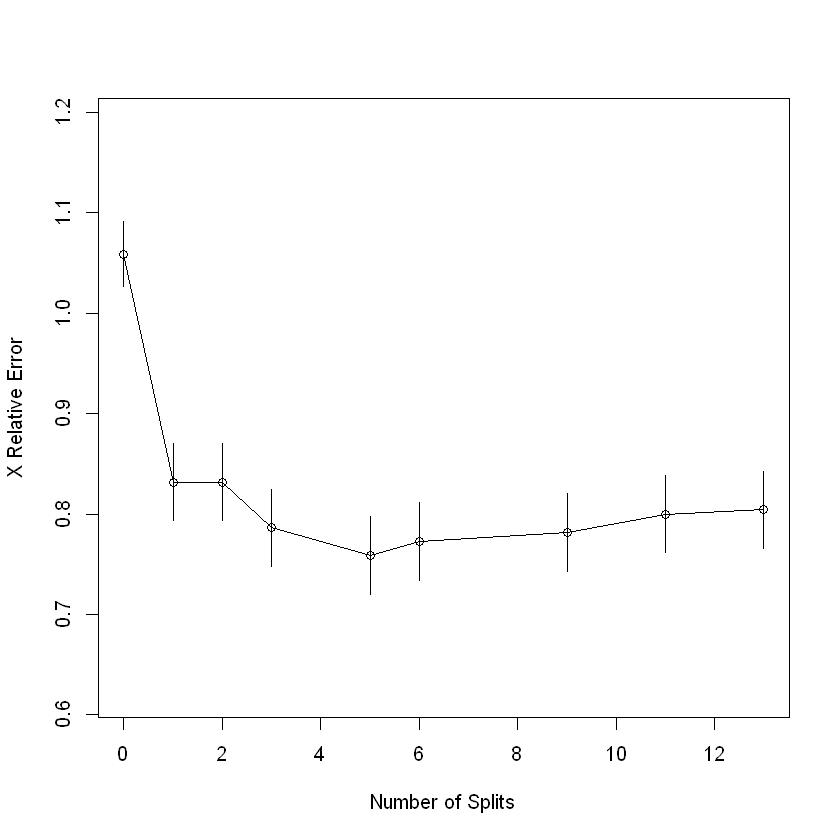

In [23]:
rsq.rpart(tree_fit)[1]

The variables considered for the model are : Advertising, Age,CompPrice,Income,Price,ShelveLoc 

There are alot of nodes

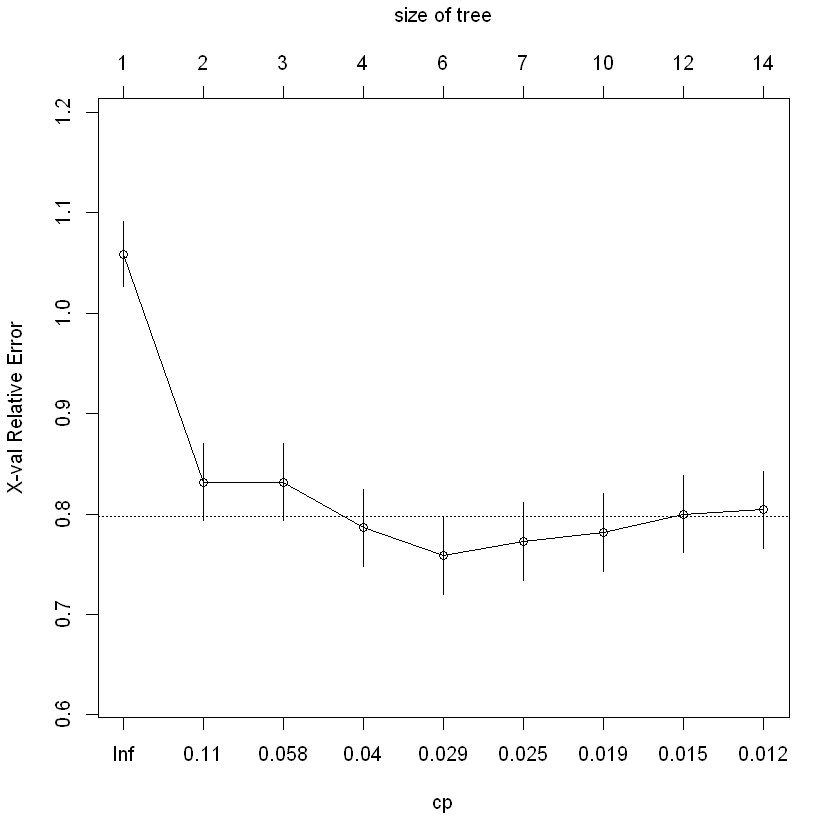

In [25]:
plotcp(tree_fit)

The above graph indicates Tree size of 5 or 6 seems better. Any split above that is waste of computing power and
causes negligible improvement on relative error. Lets check how the model fares with test data. Later we will prune the tree.

### Prediction & Performance of unpruned model

In [26]:
pred = predict(tree_fit,test,type="class")
table(pred,test$salesgrp)

           
pred        high low very high very low
  high         4   3         3        2
  low          8   9         2       12
  very high   12   5        18        0
  very low     2   8         1        9

In [27]:
print(paste("Accuracy is: ",sum(diag(table(pred,test$salesgrp)))/sum(table(pred,test$salesgrp))))

[1] "Accuracy is:  0.408163265306122"


 Now lets prune the tree and again check accuracy for pruned tree.

### Pruning the Tree:

In [28]:
best = tree_fit$cptable[which.min(tree_fit$cptable[,"xerror"]),"CP"]
tree_fit_p = prune(tree_fit,cp=best)

In [29]:
tree_fit_p$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.16818182,0,1.0000000,1.0590909,0.03220824
2,0.06818182,1,0.8318182,0.8318182,0.03809580
3,0.05000000,2,0.7636364,0.8318182,0.03809580
4,0.03181818,3,0.7136364,0.7863636,0.03863074
5,0.02727273,5,0.6500000,0.7590909,0.03886235


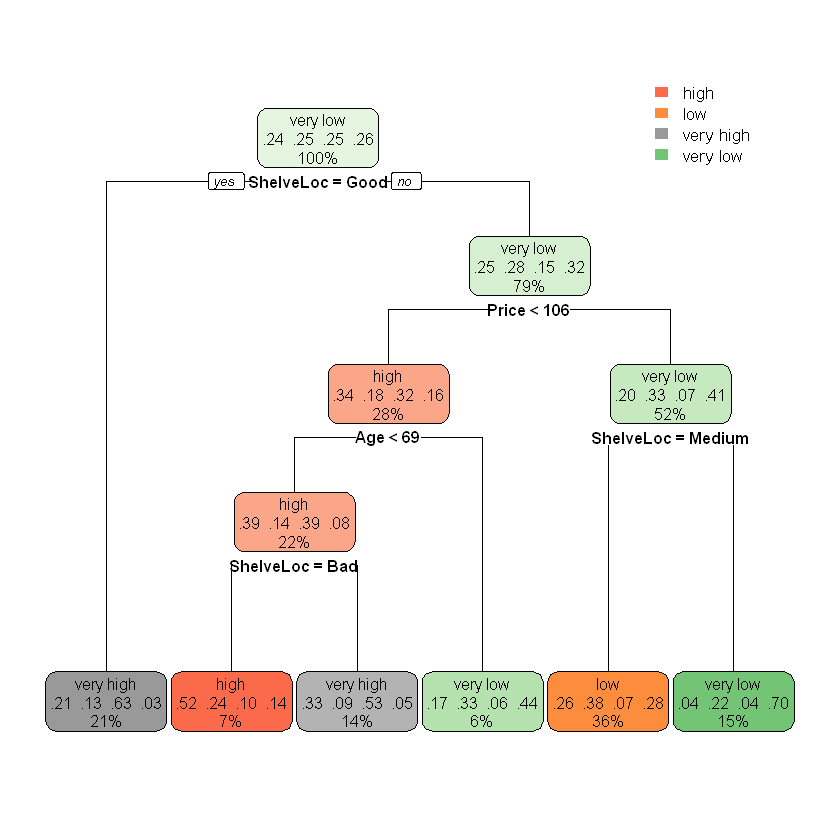

In [30]:
rpart.plot(tree_fit_p)

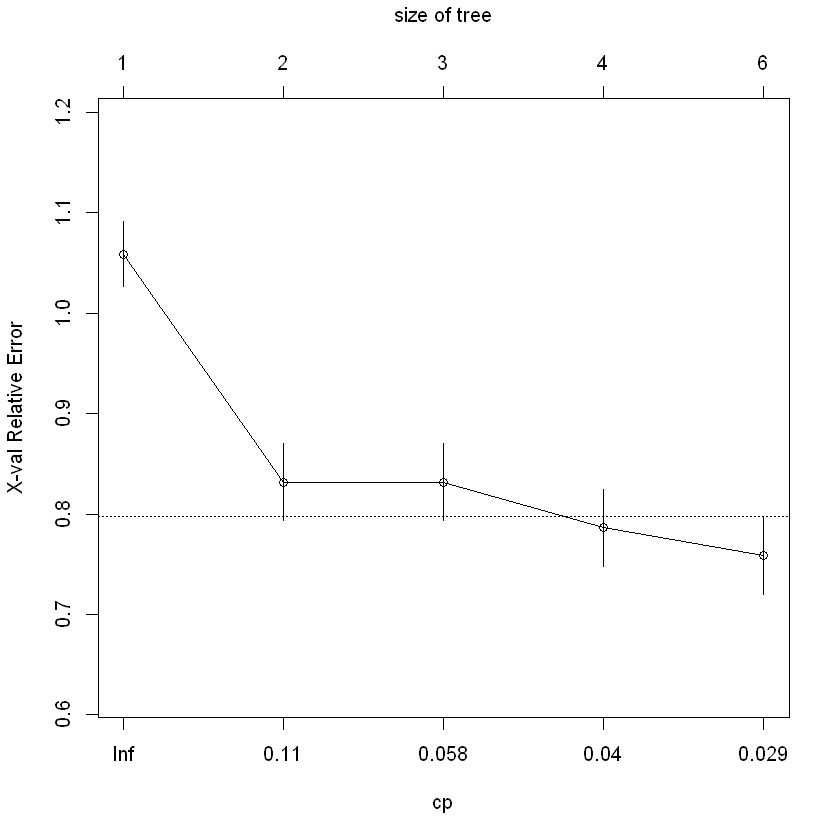

In [31]:
plotcp(tree_fit_p)

### Prediction & Performance of pruned model

In [32]:
pred_p = predict(tree_fit_p,test,type="class")
table(pred_p,test$salesgrp)

           
pred_p      high low very high very low
  high         1   0         0        0
  low          9  14         3       11
  very high   12   7        20        1
  very low     4   4         1       11

In [33]:
print(paste("Accuracy is: ",sum(diag(table(pred_p,test$salesgrp)))/sum(table(pred_p,test$salesgrp))))


[1] "Accuracy is:  0.469387755102041"


Accuracy for pruned model slightly increases.So, pruning not only helped to reduce complexity of model but also increased the accuracy.

### Comparing Unpruned and Pruned models:

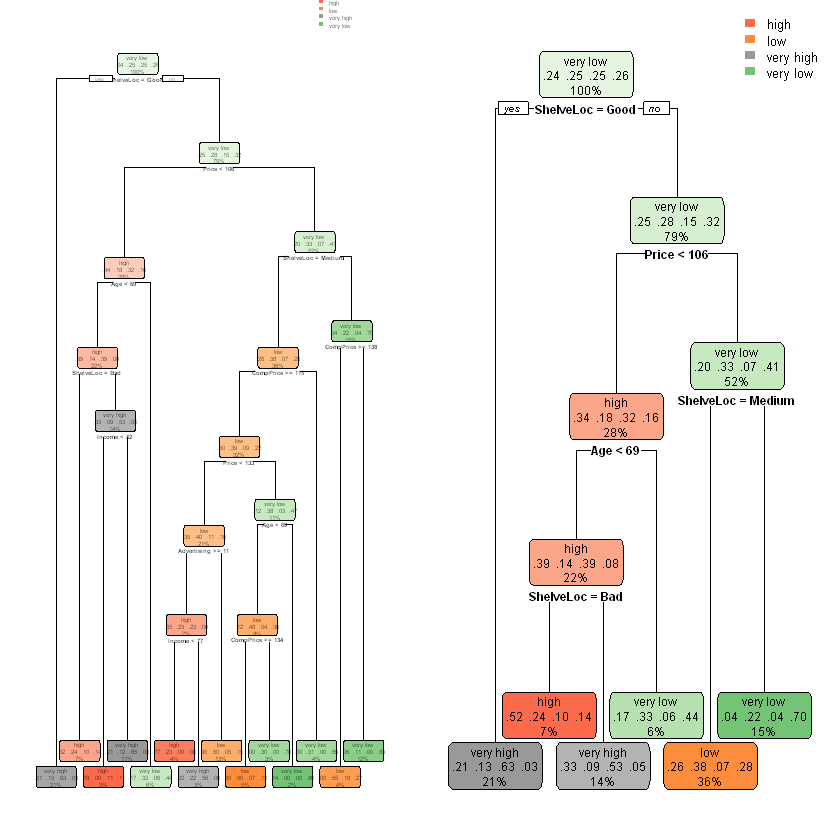

In [34]:
par(mfrow=c(1,2))
rpart.plot(tree_fit,digits=2)
rpart.plot(tree_fit_p,digits=2)

## 2. Use cross-validation in order to determine the optimal level of tree complexity(cp). Does pruning the tree improve the test MSE?

In [35]:
cv = tree(train$salesgrp ~ ., data = train,method = "class")

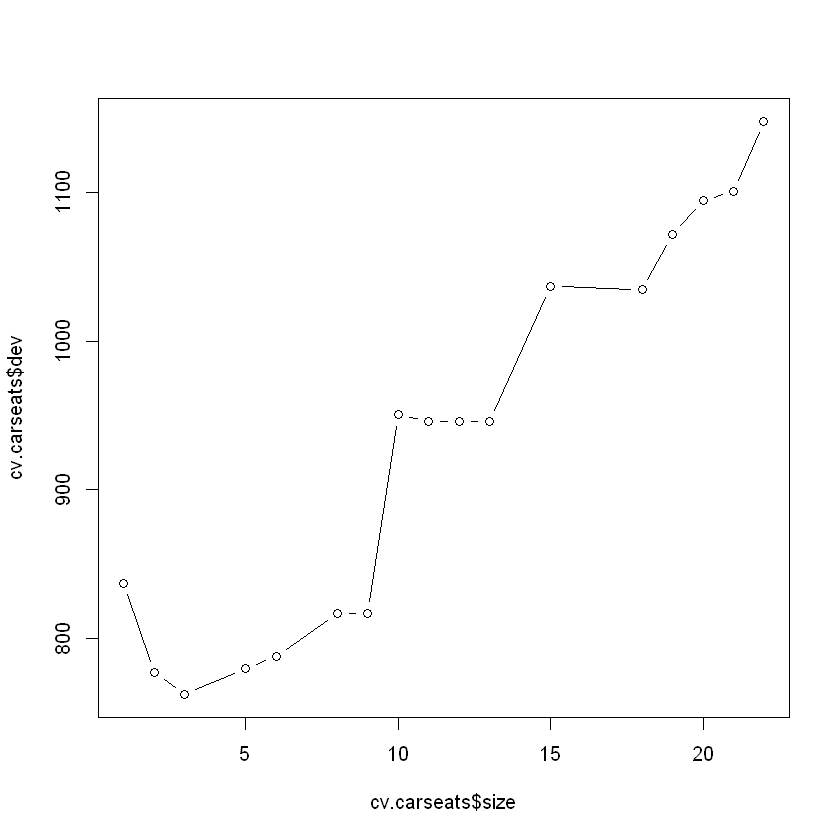

In [36]:
tree.carseats = tree(train$salesgrp ~ ., data = train,method = "class")
cv.carseats=cv.tree(tree.carseats)
plot(cv.carseats$size,cv.carseats$dev,type="b")

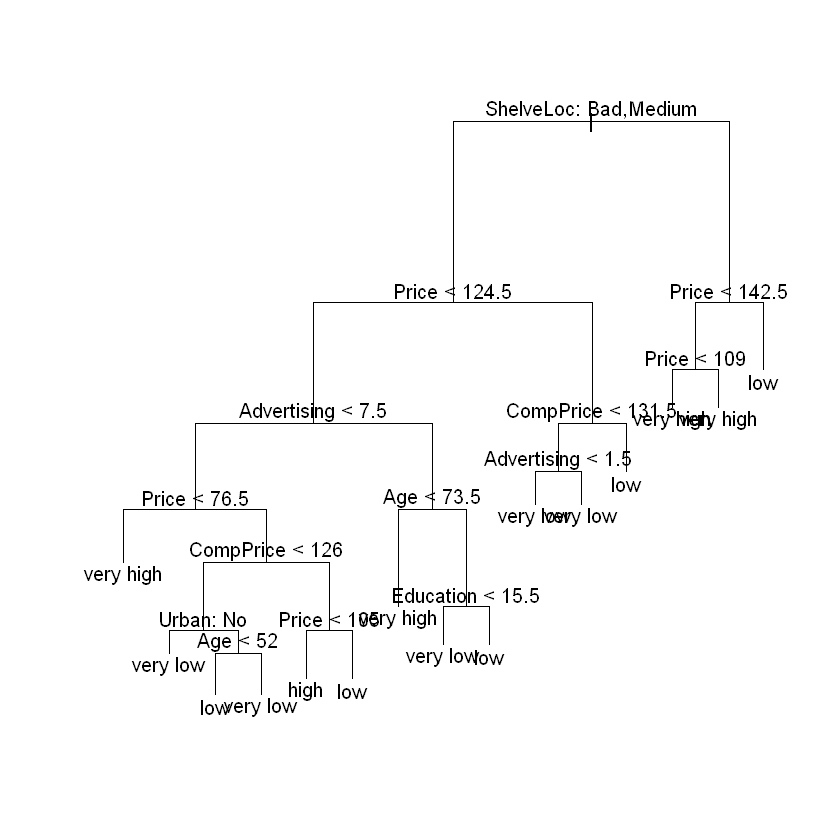

In [37]:
min.carseats=which.min(cv.carseats$dev)
prune.carseats=prune.tree(tree.carseats,best=min.carseats)
plot(prune.carseats)
text(prune.carseats ,pretty=0)

To Calculate MSE & better understanding of Cross Validation approach. Lets use regression tree instead of classification tree.

## Regression Tree fit:


In [38]:
rm(Carseats)  
library(ISLR)
set.seed(1)
num.rows = nrow(Carseats)
train = sample(1:num.rows, num.rows*0.75) # Sample of indices for training (75/25 split)
head(Carseats)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [39]:
tree.fit = tree(Carseats$Sales ~ ., data=Carseats, subset=train)# Fitting a decision tree with default parameters
tree.fit

node), split, n, deviance, yval
      * denotes terminal node

 1) root 300 2385.000  7.640  
   2) ShelveLoc: Bad,Medium 226 1349.000  6.818  
     4) Price < 105.5 74  389.300  8.314  
       8) Age < 49.5 26   83.180  9.914  
        16) Income < 61 9   10.930  8.329 *
        17) Income > 61 17   37.660 10.750 *
       9) Age > 49.5 48  203.500  7.447  
        18) Price < 91.5 16   36.900  9.043 *
        19) Price > 91.5 32  105.400  6.649  
          38) CompPrice < 123.5 24   52.760  5.966 *
          39) CompPrice > 123.5 8    7.882  8.699 *
     5) Price > 105.5 152  713.400  6.089  
      10) CompPrice < 124.5 53  191.000  4.990  
        20) Age < 33 11   26.100  6.882 *
        21) Age > 33 42  115.200  4.494 *
      11) CompPrice > 124.5 99  424.000  6.678  
        22) Price < 126.5 45  134.500  7.667  
          44) Advertising < 3.5 25   56.830  6.689 *
          45) Advertising > 3.5 20   23.870  8.890 *
        23) Price > 126.5 54  208.700  5.854  
          46) Com

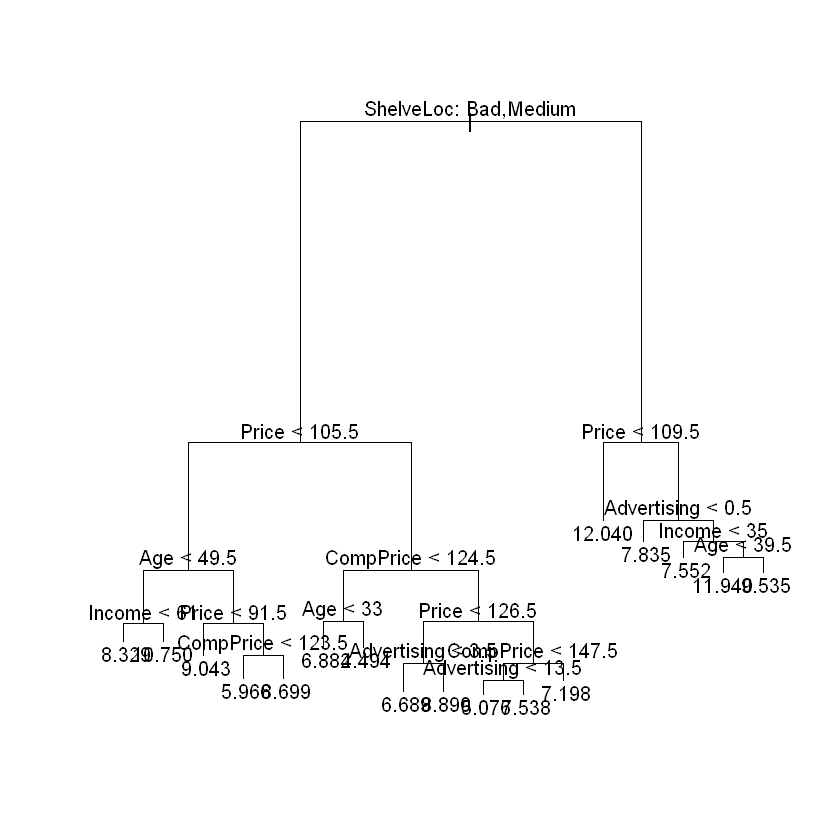

In [42]:
plot(tree.fit)  # Plotting the decision tree
text(tree.fit, pretty=0)

In [43]:
yhat.dt = predict( tree.fit,  newdata=Carseats[-train,]) # Predicting on test set
mean((yhat.dt - Carseats[-train,]$Sales)^2) # Calculating test MSE


[1] 4.910268

 Tree gets a test MSE of 4.9102

### Applying Cross Validation approach to determine the optimal terminal nodes:

In [44]:
cv.carseats = cv.tree(tree.fit)
cv.carseats

$size
 [1] 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 1329.084 1347.121 1364.654 1364.654 1350.448 1350.771 1321.314 1405.099
 [9] 1400.974 1404.145 1416.479 1463.155 1487.665 1486.232 1608.966 1830.224
[17] 2399.382

$k
 [1]      -Inf  26.52497  29.11686  29.39307  34.13814  34.59496  40.44541
 [8]  44.79934  49.69942  53.81690  61.12042  80.71971  98.42378 102.63600
[15] 151.23040 246.31381 619.17528

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

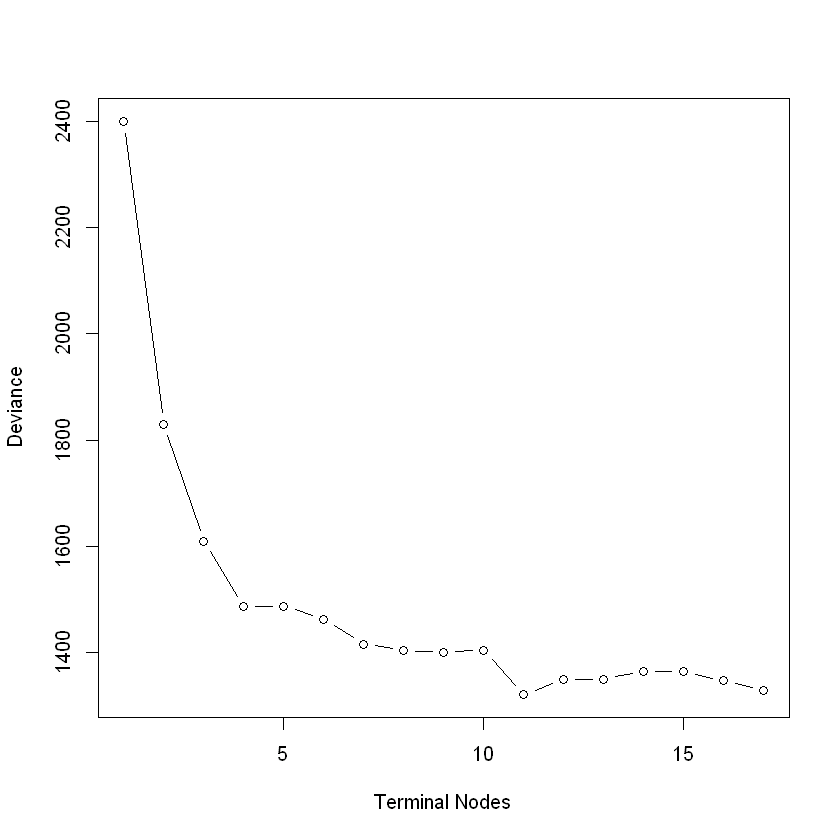

In [45]:
plot(cv.carseats$size,cv.carseats$dev, type="b",xlab="Terminal Nodes", ylab="Deviance")

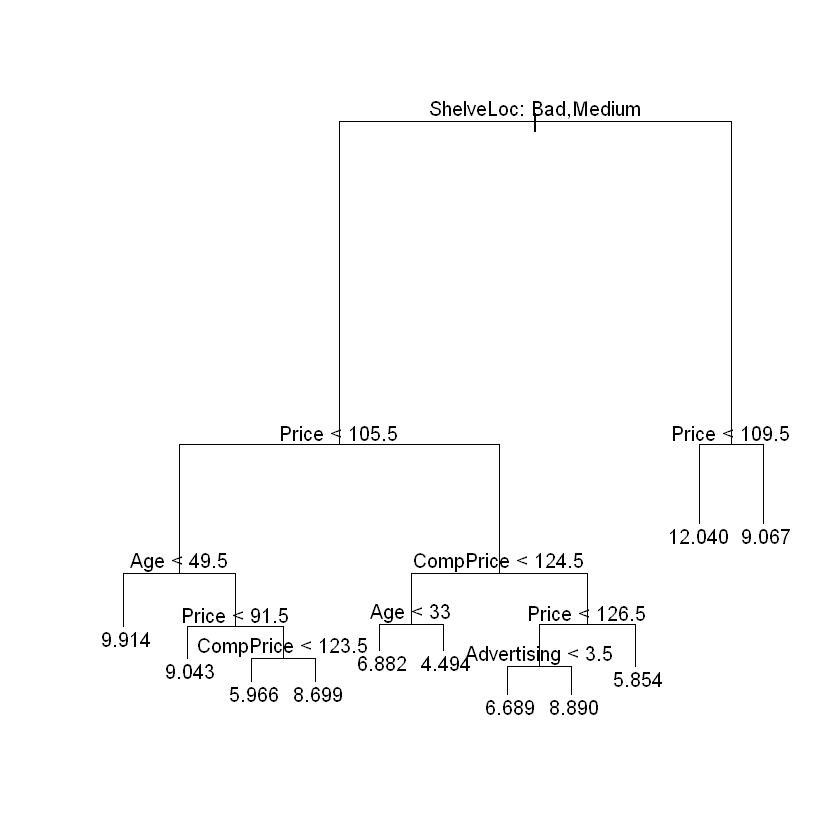

In [46]:
prune.carseats = prune.tree(tree.fit, best=11)# Pruning the tree based on 11 nodes
plot(prune.carseats)  # Viewing the pruned tree
text(prune.carseats, pretty=0)

### Prediction from prunded tree and MSE

In [47]:
yhat.pruned = predict(prune.carseats, newdata=Carseats[-train,])
mean((yhat.pruned - Carseats[-train,]$Sales)^2)  # Calculated the MSE

[1] 5.236696

#### The MSE slightly increased by pruning the tree.

# Resampling Methods

## Use income, balance and dummy variable student to predict whether default in the Default data set(in ISLR library).


## Estimate the test error of this logistic regression model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [48]:
attach(Default)

### Logistic Regression with only "Income" & "Balance"

### Splitting data into 75:25 train & test  data.

In [49]:

default1 = function() { #Creating a function to fit logistic regression and return test error.
train = sample(nrow(Default), (nrow(Default)*3)/4) #Train data set
test = Default[-train,]  #Test Data set
glm.fit1 = glm(default ~ income + balance, data=Default, family=binomial, subset=train) #Fitting logistic regression
probs = predict(glm.fit1,test, type="response")
preds = rep("No", nrow(test))
preds[probs > 0.5] = "Yes"
    
return (mean(preds != test)) #Test errors
}

## Test Error

In [50]:
for (i in 1:10){ #Run logistic regression on 10 different datasets.
    print(default1()) #Reports test error for each sample.
}

[1] 0.5795
[1] 0.5841
[1] 0.5775
[1] 0.581
[1] 0.5808
[1] 0.5792
[1] 0.5817
[1] 0.582
[1] 0.5838
[1] 0.5807


### Logistic Regression with  "Income", "Balance" & "Student"

### Splitting data into 75:25 train & test  data.

In [51]:
default2 = function() {
train = sample(nrow(Default), (nrow(Default)*3)/4)
test = Default[-train,]
glm.fit2 = glm(default ~ income + balance + student, data=Default, family=binomial, subset=train) #with Student
probs = predict(glm.fit2,test, type="response")
preds = rep("No", nrow(test))
preds[probs > 0.5] = "Yes"
    
return (mean(preds != test))
}

## Test Error

In [52]:
for (i in 1:10){
    print(default2())
}

[1] 0.5803
[1] 0.5792
[1] 0.5811
[1] 0.5759
[1] 0.5828
[1] 0.5822
[1] 0.5806
[1] 0.5742
[1] 0.5794
[1] 0.5769


#### With or without including student into the variables to predict default, the test error remains same.  So, including student as additional paramenter in the model does not add value to model.